# The Math behind Logistic Regression

Resources:

- https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/#:~:text=Linear%20regression%20is%20a%20classical%20model%20for%20predicting%20a%20numerical%20quantity.&text=Coefficients%20of%20a%20linear%20regression,squares%20solution%20to%20linear%20regression.

- https://medium.com/analytics-vidhya/logistic-regression-b35d2801a29c#:~:text=The%20goal%20of%20the%20logistic,two%20classes%20from%20one%20another.&text=Logistic%20regression%20calculates%20the%20probability,value%20of%20x%20and%20w.

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression,LogisticRegression
from IPython.display import Image

sns.set()

## Synthetic dataset

In [101]:
# Create x and y
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.0,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    shift=None,#50,
    scale=None,#20,
    random_state=124
)

## Problem

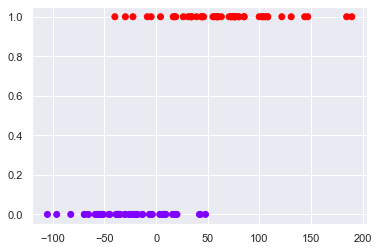

In [102]:
# Plot
plt.scatter(x, y, c=y, cmap='rainbow')

## Model

### Model formulation

The linear model

$$
\begin{aligned}
y &= \beta_0 + \beta_1x_1 + ... + \beta_nx_n + \epsilon \\
y &= X\beta + \epsilon \\
Est.:     \hat y &= X\hat\beta
\end{aligned}
$$

Estimating the model via minmization of RSS:

$$RSS = \sum (y - \hat{y})^2$$

$$\underset{\hat \beta_0,\hat \beta_1}{\operatorname{argmin}} RSS$$

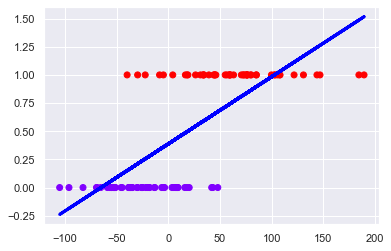

In [134]:
# Scatterplot with estimated regression line
reg = LinearRegression(fit_intercept=True).fit(x, y)
y_pred = reg.predict(x)
plt.scatter(x, y, c=y, cmap='rainbow')
plt.plot(x, y_pred, color='blue', linewidth=3)

PROBLEM: $-\infty<=\hat y<=+\infty$

SOLUTION: Introduce Link-Function (aka sigmoid)

### Logistic Regression

The sigmoid function is defined as

$$
f(x)=\frac{1}{1+exp(-x)}
$$

where: $0 <= f(x) <= 1$

So that the model becomes

$$
\begin{align}
\hat y &= \frac{1}{1+exp(-(X\hat\beta))} \\
P(y=1|X,\hat\beta) &= \frac{1}{1+exp(-(X\hat\beta))}
\end{align}
$$

and $\hat y$ can be interpreted as a conditional probability of $y$ beeing 1. 

So the model would look like this:

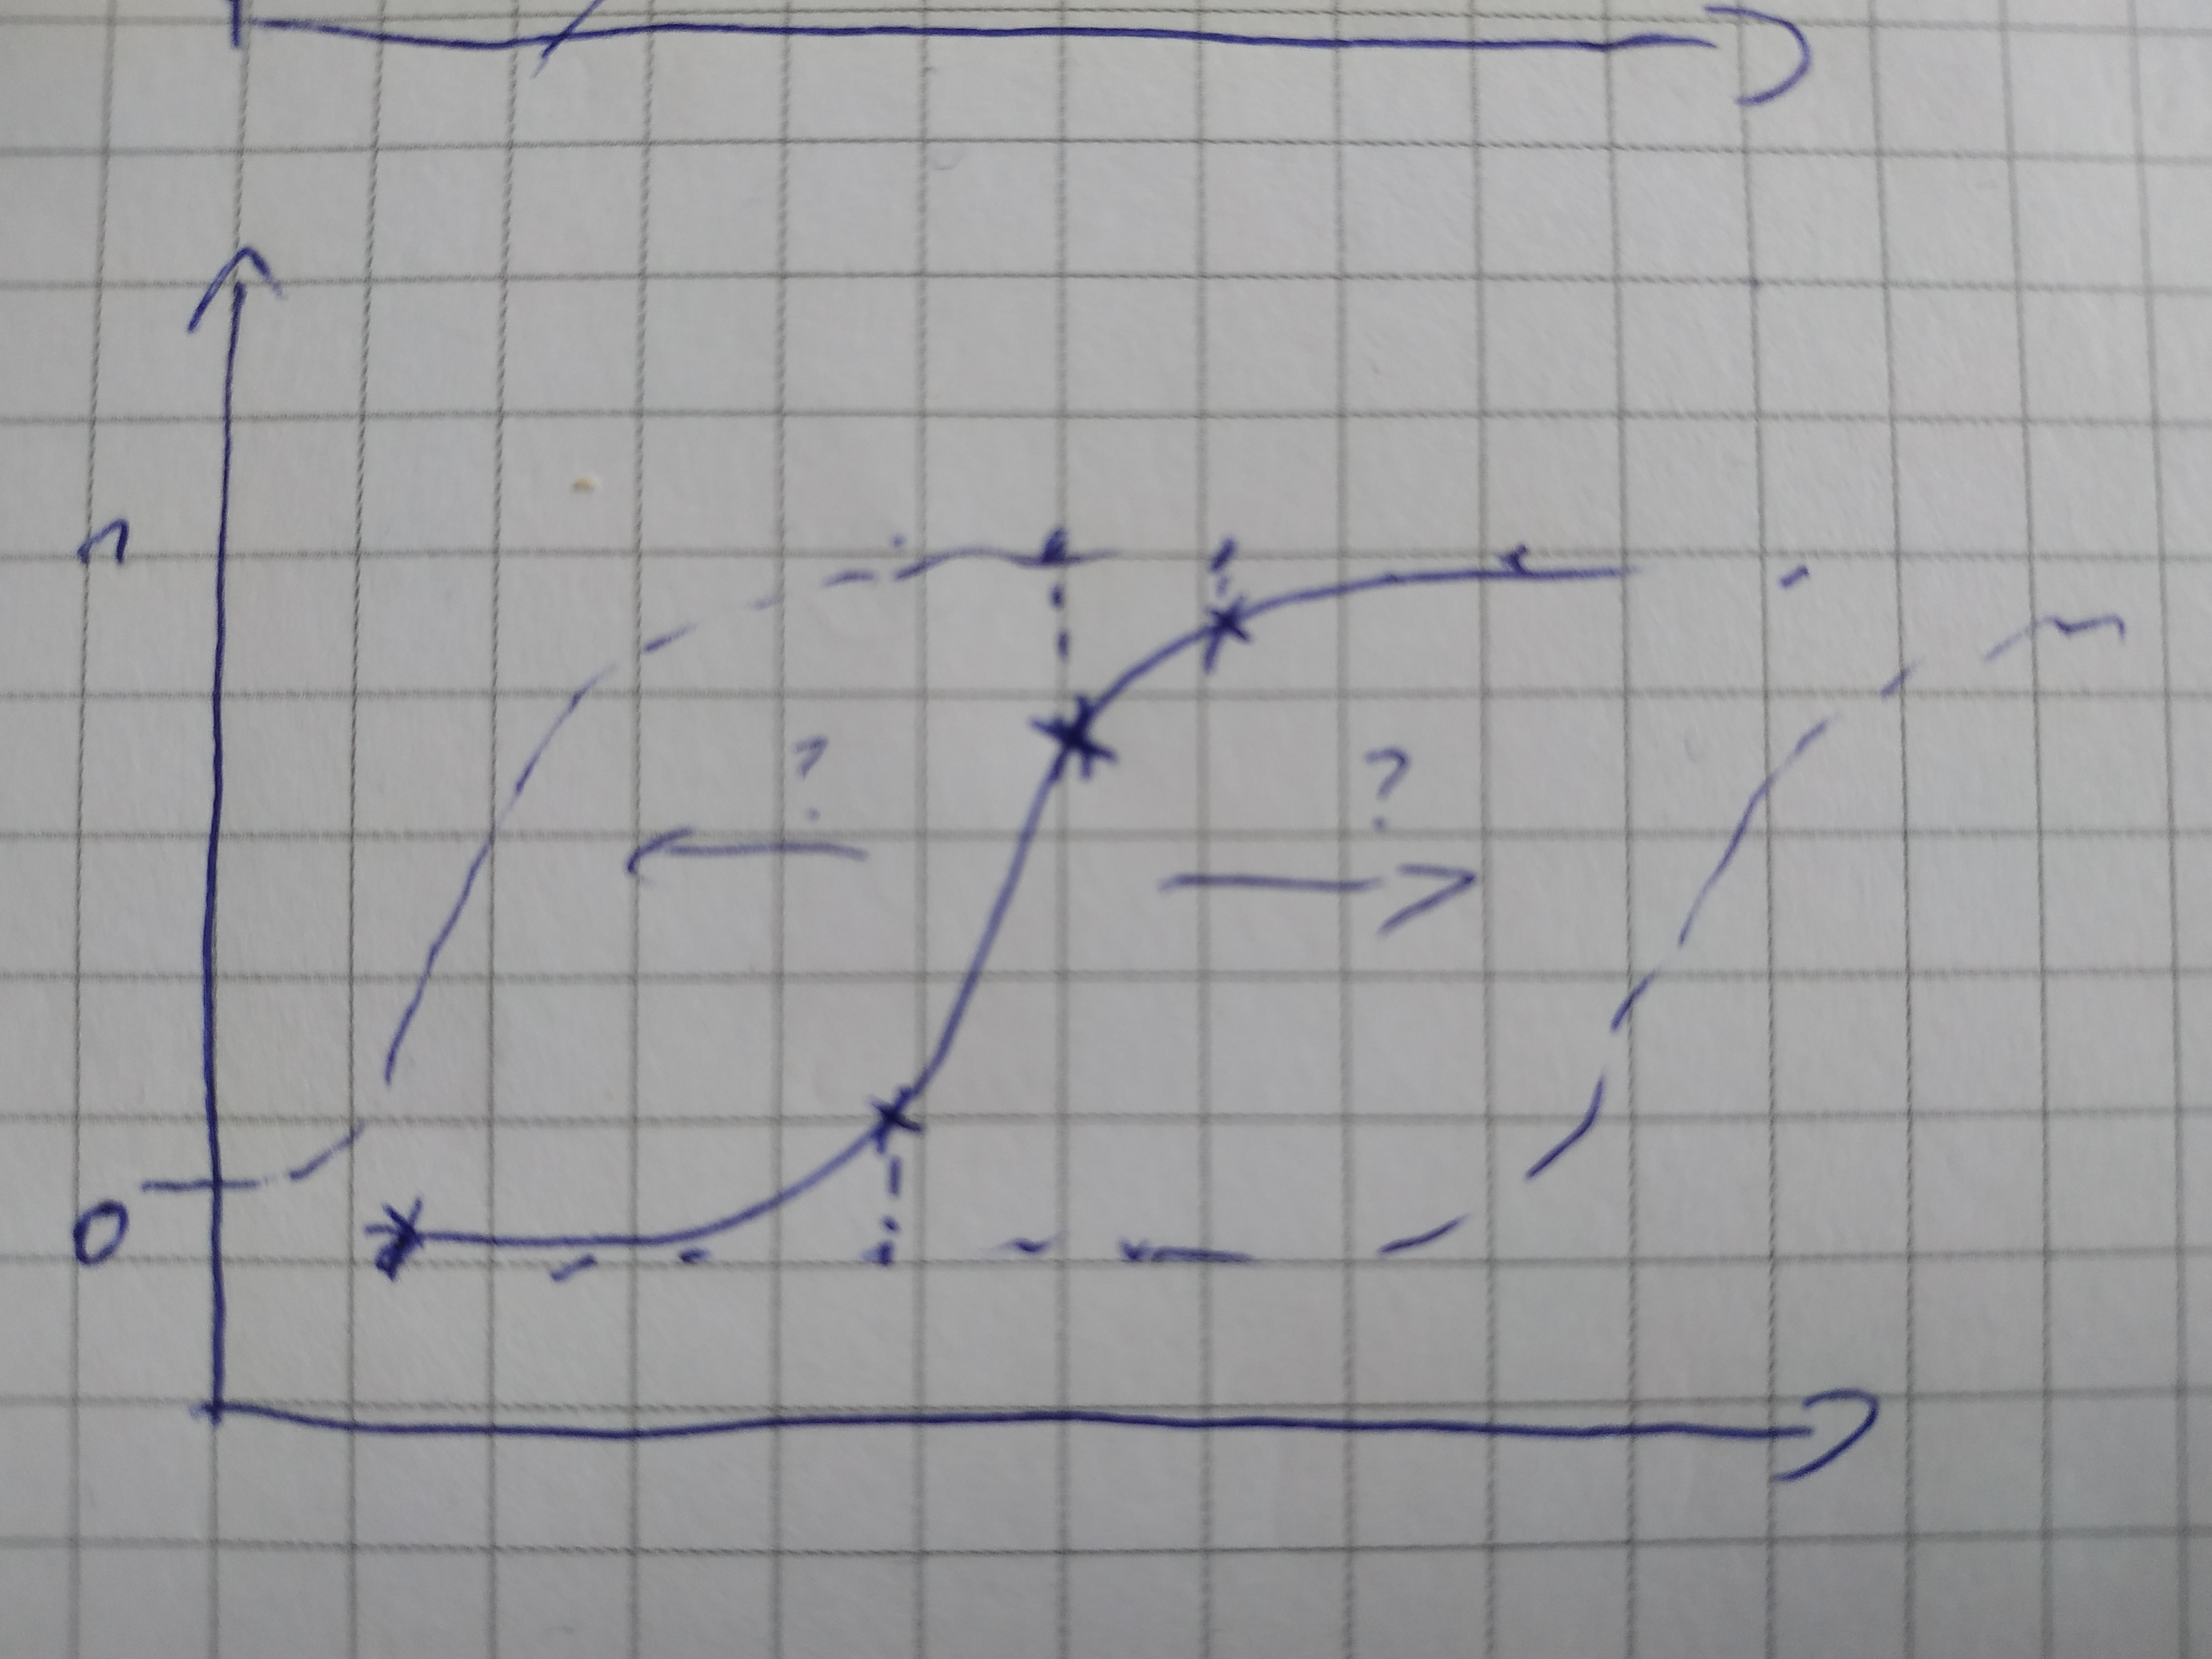

In [48]:
# Scatterplot with estimated logistic regression line and different paramters
Image("img/sigmoid.jpg",width=400)

PROBLEM: Estimating $\beta$ via minimizing RSS is not recommended. 

SOLUTION: We use an alternative, more general way of estiamting $\beta$: Maximum Likelihood Estimation (MLE)

### MLE

See http://localhost:8888/notebooks/linear_regerssion_math.ipynb#Model for MLE of Linear Model

### MLE of the Logistic Regression

First, recall that each label is binary. So we assume that the data generating process of these labels is a bernulli distribution where $p$ is the probability of observing the outcome $y=1$:

$$
y \sim Be(p)
$$

In the case of the logistic regression $p$ is not constant, but modeled via the regression equation:

$$
p=P(y=1|X,\hat\beta) = \frac{1}{1+exp(-(X\hat\beta))}
$$

NOTE: This is the same with linear regresseion. Estimating the parameter via MLE, we also assume that the data are conditionally normal distributed: $y|X\beta \sim N(\mu,\sigma)$.

Second, we need to know what the likelihood of a bernoulli distribution is:

The likelihood and respective log likelihood of a single bernoulli trial is:

$$
\begin{align}
L(p) &= p^{x_i}(1-p)^{1-x_i} \\
\log L(p) &= \log p x_i + \log(1-p) (1-x_i)
\end{align}
$$

Rewriting the likelihood in the context of a logistic regression problem would yield: 

$$
\log L(\hat y_i) = \log \hat y_i \times y_i + \log(1-\hat y_i) \times (1-y_i)
$$

where

$$
\hat y_i = \frac{1}{1+exp(-(X\hat\beta))}
$$

So the (log) likelihood is in fact

$$
\log L(\hat y_i|X,\beta_0,\beta_1) = (\log \frac{1}{1+exp(-(X\hat\beta)))} \times y_i + \log(1-(\frac{1}{1+exp(-(X\hat\beta))})) \times (1-y_i)
$$

Summing over all the observations and minimizing its negative would give us the parameters of the model:

$$
\underset{\beta_0,\beta_1}{\operatorname{argmin}} -(\sum_{i=1}^n \log L(\hat y_i|X,\beta_0,\beta_1))
$$

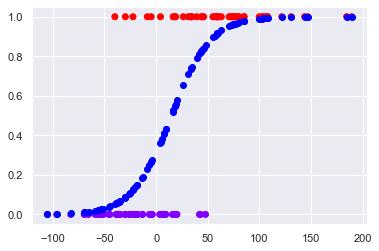

In [133]:
# Plot the correctly fitted model 
clf = LogisticRegression(random_state=0).fit(x, y)
y_prob = clf.predict_proba(x)
plt.scatter(x, y, c=y, cmap='rainbow')
plt.scatter(x, y_prob[:,1], color='blue')